# Density Based clustering - DBSCAN

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/CS1-dataset.csv",sep='\t',decimal=",",index_col=0)
df.head()

,CustomerID,I,Iu,Imax,E,PIL,Mb,Ts,MeanD,MaxD,MinD,EDate
0,17850.0,1707,21,12,4.335643,2.567,156.860294,5333.25,0.000000,0.0,0.0,0.000000
1,13047.0,1386,105,32,6.503112,2.567,356.232222,3206.09,35.000000,70.0,0.0,2.226424
2,12583.0,4992,113,360,6.504979,2.752,442.969333,6644.54,24.266667,72.0,0.0,2.235084
3,13748.0,439,24,80,4.494680,2.567,189.650000,948.25,55.400000,136.0,0.0,1.177965
4,15100.0,80,1,32,0.000000,2.567,292.000000,876.00,13.000000,32.0,0.0,0.918296


In [11]:
len(df)

5575

## Transformation

In [12]:
#Eliminiamo il client id null per adesso poi non ci sarà
df=df[df["CustomerID"].notnull()]
del df['CustomerID']

#Eliminiamo MinD
del df['MinD']

#Eliminiamo MaxD
del df['MaxD']

#Eliminiamo Ts
del df['Ts']


df.head()

,I,Iu,Imax,E,PIL,Mb,MeanD,EDate
0,1707,21,12,4.335643,2.567,156.860294,0.000000,0.000000
1,1386,105,32,6.503112,2.567,356.232222,35.000000,2.226424
2,4992,113,360,6.504979,2.752,442.969333,24.266667,2.235084
3,439,24,80,4.494680,2.567,189.650000,55.400000,1.177965
4,80,1,32,0.000000,2.567,292.000000,13.000000,0.918296


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#StandardScaler corrisponde allo z scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)
print(X[:8])

[[8.67950446e-03 1.14025086e-02 2.29214420e-03 4.18976976e-01
  1.67671736e-01 5.78415905e-03 0.00000000e+00 0.00000000e+00]
 [7.04637379e-03 5.92930445e-02 6.45967910e-03 6.28431304e-01
  1.67671736e-01 1.31542413e-02 1.91780822e-01 9.61982496e-01]
 [2.53923838e-02 6.38540479e-02 7.48072515e-02 6.28611740e-01
  1.79798112e-01 1.63606087e-02 1.32968037e-01 9.65724206e-01]
 [2.22838391e-03 1.31128848e-02 1.64617629e-02 4.34345594e-01
  1.67671736e-01 6.99627969e-03 3.03561644e-01 5.08969615e-01]
 [4.01923126e-04 0.00000000e+00 6.45967910e-03 0.00000000e+00
  1.67671736e-01 1.07798009e-02 7.12328767e-02 3.96772868e-01]
 [1.06891201e-02 3.42075257e-02 2.97978746e-02 5.54425513e-01
  1.67671736e-01 1.21932414e-02 1.33855186e-01 8.16972128e-01]
 [1.82086439e-02 8.32383124e-02 2.47968327e-02 6.58015362e-01
  1.67671736e-01 9.78543728e-03 9.31506849e-02 9.40992053e-01]
 [1.02566712e-02 2.56556442e-02 2.97978746e-02 5.25718650e-01
  1.67671736e-01 1.64538813e-02 1.61187215e-01 8.38302990e-01]]

## Stima del valore di epsilon

In [14]:
#imports
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics
from itertools import product
from scipy.spatial.distance import pdist, squareform

In [15]:
dist = pdist(X, 'euclidean') 
dist = squareform(dist)

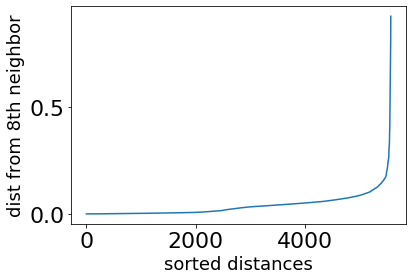

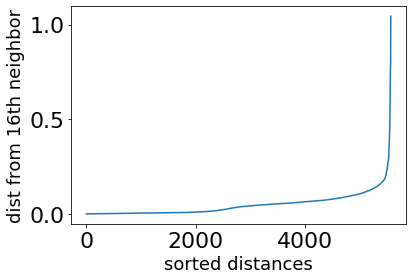

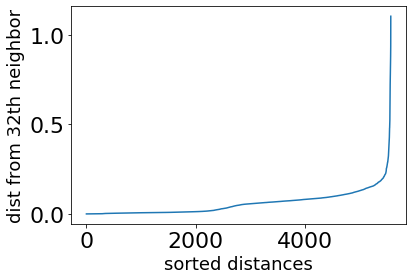

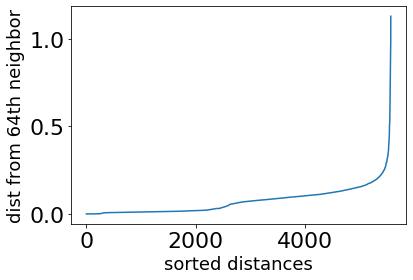

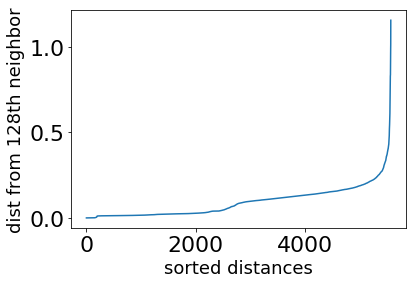

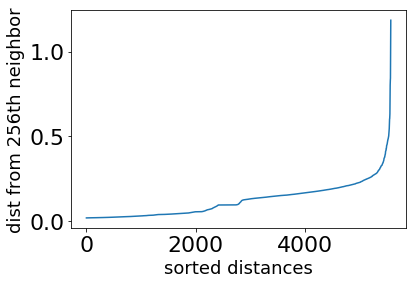

In [16]:
k=[8,16,32,64,128,256]
for current_k in k:
    kth_distances = list()
    for d in dist:
        index_kth_distance = np.argsort(d)[current_k]
        kth_distances.append(d[index_kth_distance])
    plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
    plt.ylabel('dist from %sth neighbor' % current_k, fontsize=18)
    plt.xlabel('sorted distances', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.show()

Al varieare dei vari parametri K abbiamo stimato il valore di epsilon che è intorno allo 0.2

## Scelta valore minpoint
La scelta del valore min point può essere effettuata tramite svariate euristice (2*dim^2 dim+1 ecc) tuttavia abbiamo preferito testare svariate combinazioni di questo parametro in relazione all'epsilon selezionato e vedere la variazione della silhouette prendendo quella massima

In [17]:

grid_params = {"minsamples": [3,14,20,50,100,150,170,180,200,250,300,350,400,450,500,550,600,700,800,1000],"eps":[0.10, 0.15, 0.20,0.25,0.30,0.35, 0.40]}

keys, values = zip(*grid_params.items())

params_list = [dict(zip(keys, v)) for v in product(*values)]
#print(params_list)

In [18]:
value_list = []
max_silhouette = 0


#Cerchiamo la miglior combinazione tra il valore di epsilon e MinPoints, trovate da KNN
for elem in params_list:
    dbscan = DBSCAN(eps=elem["eps"], min_samples=elem["minsamples"])
    dbscan.fit(X)
    value=silhouette_score(X,dbscan.labels_)
    value_list.append(value)

    if(value > max_silhouette):
        max_silhouette = value
        print(elem, np.unique(dbscan.labels_, return_counts=True),max_silhouette)


{'minsamples': 3, 'eps': 0.15} (array([-1,  0], dtype=int64), array([  61, 5514], dtype=int64)) 0.38020220047572756
{'minsamples': 3, 'eps': 0.2} (array([-1,  0], dtype=int64), array([  34, 5541], dtype=int64)) 0.4504860328791096
{'minsamples': 3, 'eps': 0.3} (array([-1,  0,  1], dtype=int64), array([  14, 5558,    3], dtype=int64)) 0.4544458554274768
{'minsamples': 3, 'eps': 0.35} (array([-1,  0], dtype=int64), array([   9, 5566], dtype=int64)) 0.5133693420999828
{'minsamples': 3, 'eps': 0.4} (array([-1,  0], dtype=int64), array([   8, 5567], dtype=int64)) 0.5231988121312284
{'minsamples': 14, 'eps': 0.4} (array([-1,  0], dtype=int64), array([  13, 5562], dtype=int64)) 0.53995196352513
{'minsamples': 180, 'eps': 0.1} (array([-1,  0], dtype=int64), array([2524, 3051], dtype=int64)) 0.5489348796074744
{'minsamples': 400, 'eps': 0.15} (array([-1,  0], dtype=int64), array([2474, 3101], dtype=int64)) 0.5602912416914375
{'minsamples': 700, 'eps': 0.2} (array([-1,  0], dtype=int64), array([2

## Training finale

In [23]:
dbscan = DBSCAN(eps=0.2, min_samples=700)
dbscan.fit(X)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))


Silhouette 0.5664820972599252


In [24]:
dbscan.labels_[:8]

array([ 0, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [25]:
#Numero di cluster ed elementi all'interno
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0], dtype=int64), array([2402, 3173], dtype=int64))